Reading the file

In [84]:
import pandas as pd

file_name = "data/CookingBehavior.xlsx"
df = pd.read_excel(file_name)
print(df.head())


  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [10]:
pip install openpyxl



   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------------------------------------- 250.9/250.9 kB 15.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd

file_path = "data/CookingBehavior.xlsx"
excel_file = pd.ExcelFile(file_path)

print(excel_file.sheet_names)


['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


In [17]:
import pandas as pd

file_path = "data/CookingBehavior.xlsx"

user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv', engine='openpyxl')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv', engine='openpyxl')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv', engine='openpyxl')

print("User Details Dataset")
print(user_details.head())
print("Cooking Sessions Dataset")
print(cooking_sessions.head())
print("Order Details Dataset")
print(order_details.head())


User Details Dataset
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
Cooking Sessions Dataset
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002   

In [18]:
# Check the structure of each DataFrame
print(user_details.info())  
print(cooking_sessions.info())  # General information about the cooking_sessions dataset
print(order_details.info())  # General information about the order_details dataset

# Check for missing values
print(user_details.isnull().sum())  # Count of missing values in user_details
print(cooking_sessions.isnull().sum())  # Count of missing values in cooking_sessions
print(order_details.isnull().sum())  # Count of missing values in order_details

# Check for duplicate entries
print(user_details.duplicated().sum())  # Number of duplicate rows in user_details
print(cooking_sessions.duplicated().sum())  # Number of duplicate rows in cooking_sessions
print(order_details.duplicated().sum())  # Number of duplicate rows in order_details

# Generate descriptive statistics for numerical columns to check for outliers or incorrect data
print(user_details.describe())  # Summary statistics of numerical columns in user_details
print(cooking_sessions.describe())  # Summary statistics of numerical columns in cooking_sessions
print(order_details.describe())  # Summary statistics of numerical columns in order_details


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Se

In [21]:
user_details.dropna(inplace=True)
cooking_sessions.dropna(inplace=True)
order_details.dropna(inplace=True)

In [22]:
# Remove duplicate rows from each DataFrame
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)


In [23]:
# Standardize column names by converting them to lowercase and removing spaces
user_details.columns = user_details.columns.str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.lower().str.replace(' ', '_')

# Check the new column names to ensure they are standardized
print(user_details.columns)
print(cooking_sessions.columns)
print(order_details.columns)


Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')
Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')


In [24]:
# Merge user_details and cooking_sessions on 'user_id'
merged_data = pd.merge(user_details, cooking_sessions, on='user_id')

# Now merge with order_details on 'user_id'
merged_data = pd.merge(merged_data, order_details, on='user_id')

# Check the first few rows of the merged data to ensure the merge was successful
print(merged_data.head())


  user_id      user_name  age  location registration_date         phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             email favorite_meal  total_orders session_id_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  session_rating order_id order_date meal_type_y      dish_name_y  \
0            4.5     1001 2024-12-01      Dinner        Spaghetti   
1 

In [25]:
# Check if there are any missing values after merging
print(merged_data.isnull().sum())

# Check if there are any duplicate rows after merging
print(merged_data.duplicated().sum())

# Get the final summary statistics to check for outliers or anomalies in the merged data
print(merged_data.describe())


user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
session_id_x         0
dish_name_x          0
meal_type_x          0
session_start        0
session_end          0
duration_(mins)      0
session_rating       0
order_id             0
order_date           0
meal_type_y          0
dish_name_y          0
order_status         0
amount_(usd)         0
time_of_day          0
rating               0
session_id_y         0
dtype: int64
0
             age    registration_date  total_orders        session_start  \
count  32.000000                   32     32.000000                   32   
mean   31.718750  2023-03-13 12:45:00     10.218750  2024-12-04 13:03:45   
min    25.000000  2023-01-15 00:00:00      5.000000  2024-12-01 12:00:00   
25%    28.000000  2023-01-15 00:00:00      8.000000  2024-12-02 07:30:00   
50%    30.000000  2023-02-20 0

In [26]:
# Save the cleaned and merged data to a new CSV file
merged_data.to_csv('data/cleaned_merged_data.csv', index=False)

# Alternatively, save it as an Excel file
merged_data.to_excel('data/cleaned_merged_data.xlsx', index=False)


In [30]:
cooking_to_orders = merged_data.groupby('user_id').apply(
    lambda x: len(x[x['order_status'] == 'Completed']) / len(x[x['dish_name_y'] == x['dish_name_y']])
)
print(cooking_to_orders.mean())




1.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15440\2737561657.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cooking_to_orders = merged_data.groupby('user_id').apply(


In [31]:
# Group by 'User ID' and apply a lambda function to calculate the ratio
cooking_to_orders = merged_data.groupby('user_id').apply(
    lambda x: len(x[x['order_status'] == 'Completed']) / len(x[x['dish_name_y'].notna()])
)

# Calculate the mean of the ratio for all users
print(cooking_to_orders.mean())


1.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15440\2642713616.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cooking_to_orders = merged_data.groupby('user_id').apply(


In [34]:
# Count the most popular dishes in cooking sessions
popular_dishes = cooking_sessions['dish_name'].value_counts().head(10)

# Print the most popular dishes
print(popular_dishes)


dish_name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [36]:
# Analyze the cooking and ordering behavior by location
location_analysis = merged_data.groupby('location').apply(
    lambda x: len(x[x['order_status'] == 'Completed']) / len(x)
)

# Print the results for each location
print(location_analysis)


location
Austin           1.0
Boston           1.0
Chicago          1.0
Los Angeles      1.0
Miami            1.0
New York         1.0
San Francisco    1.0
Seattle          1.0
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15440\4185848897.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  location_analysis = merged_data.groupby('location').apply(


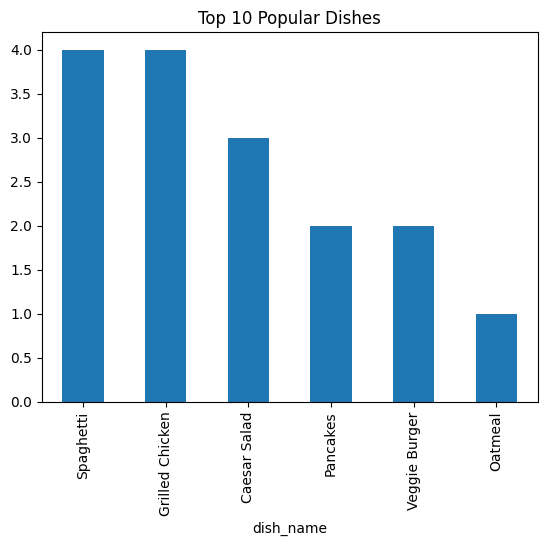

In [37]:
import matplotlib.pyplot as plt
popular_dishes.plot(kind='bar')
plt.title('Top 10 Popular Dishes')
plt.show()


In [40]:
plt.scatter(merged_data['CookingSessions.csv'], merged_data['Orders'])
plt.xlabel('Cooking Sessions')
plt.ylabel('Orders')
plt.title('Cooking Sessions vs. Orders')
plt.show()


KeyError: 'CookingSessions.csv'

In [41]:
print(merged_data.columns)


Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders', 'session_id_x', 'dish_name_x',
       'meal_type_x', 'session_start', 'session_end', 'duration_(mins)',
       'session_rating', 'order_id', 'order_date', 'meal_type_y',
       'dish_name_y', 'order_status', 'amount_(usd)', 'time_of_day', 'rating',
       'session_id_y'],
      dtype='object')


In [48]:
cooking_sessions_per_user = merged_data.groupby('user_id')['session_id_x'].nunique()
orders_per_user = merged_data.groupby('user_id')['order_id'].nunique()


In [50]:
user_data = pd.DataFrame({
    'CookingSessions': cooking_sessions_per_user,
    'Orders': orders_per_user
}).reset_index()


In [60]:
# Check if 'total_orders' and 'session_rating' are more appropriate for correlation
correlation = merged_data['total_orders'].corr(merged_data['session_rating'])
print(f"Correlation between Total Orders and Session Rating: {correlation}")


Correlation between Total Orders and Session Rating: 0.47437468306840913


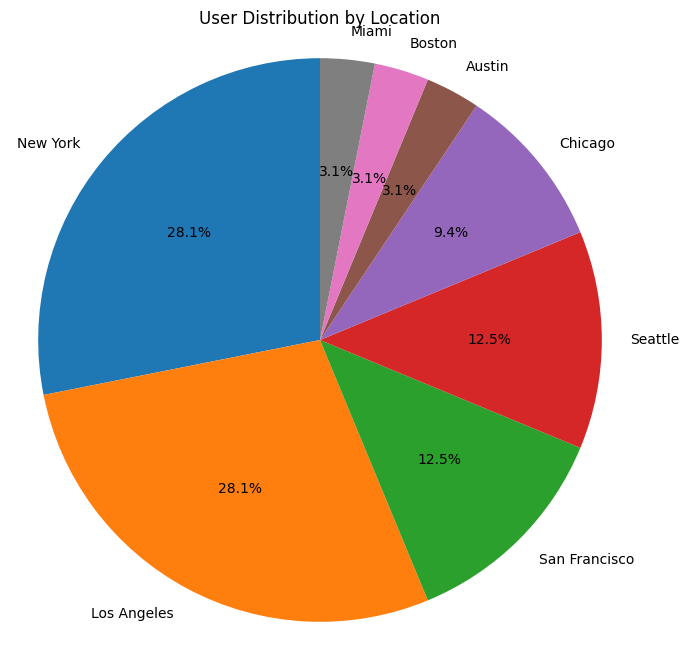

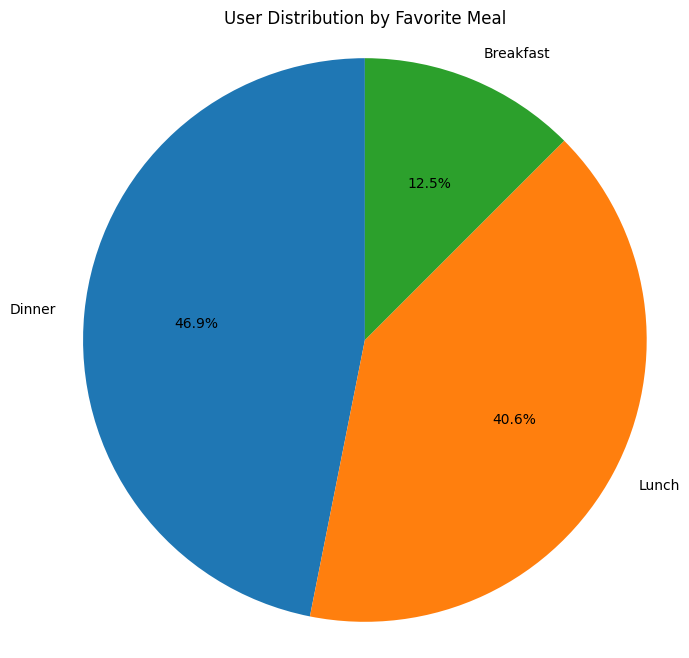

In [61]:
import matplotlib.pyplot as plt

# Pie chart for 'location' distribution
location_counts = merged_data['location'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('User Distribution by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Pie chart for 'favorite_meal' distribution
meal_counts = merged_data['favorite_meal'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('User Distribution by Favorite Meal')
plt.axis('equal')
plt.show()


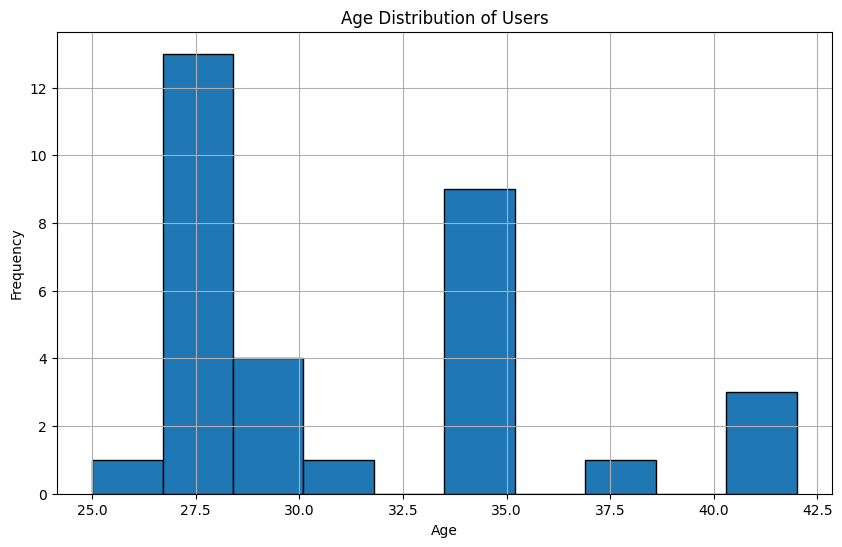

In [62]:
# Histogram for 'age'
plt.figure(figsize=(10, 6))
plt.hist(merged_data['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Users')
plt.grid(True)
plt.show()


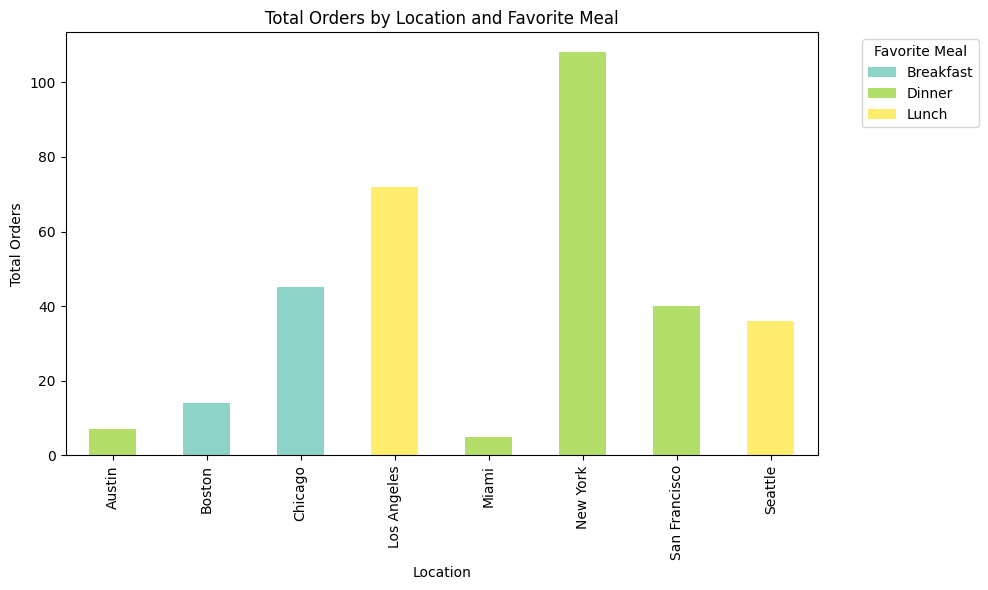

In [65]:
# Create a pivot table to compare total orders by 'location' and 'favorite_meal'
pivot_data = merged_data.pivot_table(index='location', columns='favorite_meal', values='total_orders', aggfunc='sum', fill_value=0)

# Stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Total Orders by Location and Favorite Meal')
plt.ylabel('Total Orders')
plt.xlabel('Location')
plt.legend(title='Favorite Meal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [79]:
print(merged_data.columns)


Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders', 'session_id_x', 'dish_name_x',
       'meal_type_x', 'session_start', 'session_end', 'duration_(mins)',
       'session_rating', 'order_id', 'order_date', 'meal_type_y',
       'dish_name_y', 'order_status', 'amount_(usd)', 'time_of_day', 'rating',
       'session_id_y'],
      dtype='object')


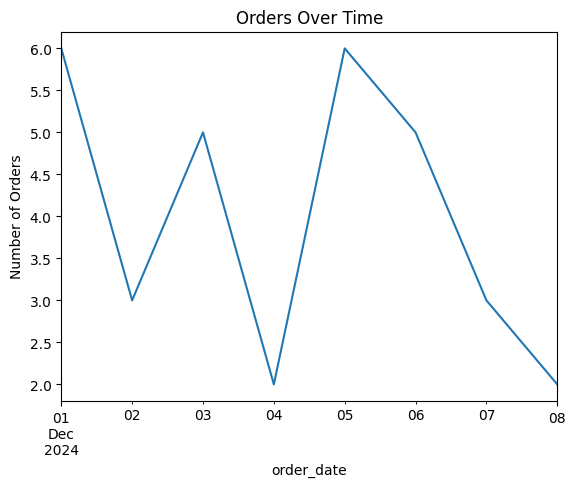

In [81]:
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
orders_by_date = merged_data.groupby('order_date').size()
orders_by_date.plot(kind='line', title='Orders Over Time')
plt.ylabel('Number of Orders')
plt.show()


In [83]:
print(merged_data['order_date'].head())

0   2024-12-01
1   2024-12-02
2   2024-12-05
3   2024-12-01
4   2024-12-02
Name: order_date, dtype: datetime64[ns]
